# <center> **Chapitre 2 : Importation, Manipulation et Visualisation des données de séries temporelles avec Python**

Par [Josué AFOUDA](https://josueafouda.shinyapps.io/jadatatechconsulting/)

## Objectif 1 : Web Scraping de données de séries chronologiques

Pour ce premier objectif, vous apprendrez d'abord à récupérer sur internet des données de séries chronologiques et à les mettre sous un bon format. En effet, même si les données temporelles sont partout, les retrouver et les assembler est souvent un parcours de combattant, comme c'est le cas dans la plupart des projets de Data Science dignes du nom !. J'ai donc imaginé un beau scénario pour vous :). 

***Vous êtes Analyste quantitatif dans une société d'investissement. Votre Manager vous demande de créer une dataframe des prix journaliers de clôture des Actions françaises. Chaque secteur doit être représenté par la plus grande entreprise du CAC 40 (indice boursier représentant le marché financier en France) selon la [capitalisation boursière](https://www.investopedia.com/terms/m/marketcapitalization.asp). Vous devez récupérer les données depuis le 1er Janvier 2015 jusqu'à ce jour afin de permettre une actualisation automatique des informations.*** 

Ayant commencé par une recherche internet sur l'indice du CAC 40, vous avez obtenu les informations ci-dessous : 

* Le **CAC (Cotation Assistée en Continu) 40** est le principal indice de la bourse de Paris.

* Liste des actions qui composent le CAC 40 : https://en.wikipedia.org/wiki/CAC_40 (Recherche Google).

Vous allez donc utiliser le lien ci-dessus pour scrapper les données à partir de Yahoo Finance. Commençons par importer les librairies nécessaires.

In [119]:
from warnings import filterwarnings
filterwarnings('ignore')

In [120]:
#!pip install xgboost

In [121]:
# Importation des librairies

import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader, get_quote_yahoo
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_regression

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [122]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


Etant donné que vous voulez récupérer les prix journaliers de la plus grande entreprise, par secteur, en matière de capitalisation boursière, il faudra avoir la capitalisation boursière de chacune des entreprises de cet indice. 

Lorsque vous copiez-collez par exemple le symbole de la société Air Liquide dans la barre de recherche de Yahoo Finance, vous obtenez ce lien : https://fr.finance.yahoo.com/quote/AI.PA?p=AI.PA&.tsrc=fin-srch. 

Comme le montre la figure ci-dessus, la capitalisation boursière de Air Liquide est de 70,971 milliards d'euros à l'heure où j'écris cette phrase. Cette valeur est certainement placée au même endroit pour n'importe quelle action. Pour vous en rassurer, vous pouvez rechercher par exemple la capitalisation boursière de LVMH (figure ci-dessous) :

L'idée est donc de récupérer automatiquement la capitalisation boursière de chaque entreprise du CAC40 et d'ajouter ces informations dans une nouvelle colonne de la dataframe précédente. Je vais vous montrer un moyen simple de le faire.

In [123]:
# Symboles des actions du CAC40

tickers = cac40['Ticker'].to_list()

tickers

['AI.PA',
 'AIR.PA',
 'ALO.PA',
 'MT.AS',
 'CS.PA',
 'BNP.PA',
 'EN.PA',
 'CAP.PA',
 'CA.PA',
 'ACA.PA',
 'BN.PA',
 'DSY.PA',
 'ENGI.PA',
 'EL.PA',
 'ERF.PA',
 'RMS.PA',
 'KER.PA',
 'OR.PA',
 'LR.PA',
 'MC.PA',
 'ML.PA',
 'ORA.PA',
 'RI.PA',
 'PUB.PA',
 'RNO.PA',
 'SAF.PA',
 'SGO.PA',
 'SAN.PA',
 'SU.PA',
 'GLE.PA',
 'STLAP.PA',
 'STMPA.PA',
 'TEP.PA',
 'HO.PA',
 'TTE.PA',
 'URW.AS',
 'VIE.PA',
 'DG.PA',
 'VIV.PA',
 'WLN.PA']

https://stackoverflow.com/questions/54815864/downloading-a-companys-market-cap-from-yahoo

In [124]:
# Récupération des capitalisations boursières

market_cap = get_quote_yahoo(tickers)['marketCap']

market_cap

AI.PA        82470797312
AIR.PA       99650281472
ALO.PA        9236808704
MT.AS        20239501312
CS.PA        64992296960
BNP.PA       70590341120
EN.PA        11725345792
CAP.PA       29234657280
CA.PA        13556524032
ACA.PA       32078696448
BN.PA        38075863040
DSY.PA       49375498240
ENGI.PA      36471021568
EL.PA        74611474432
ERF.PA       12025611264
RMS.PA      195697000448
KER.PA       68859052032
OR.PA       219480195072
LR.PA        21723414528
MC.PA       422975275008
ML.PA        20050919424
ORA.PA       30469617664
RI.PA        53029621760
PUB.PA       17765677056
RNO.PA       10536507392
SAF.PA       58183266304
SGO.PA       26455312384
SAN.PA      127918882816
SU.PA        85600403456
GLE.PA       17070866432
STLAP.PA     51227942912
STMPA.PA     41431810048
TEP.PA       12700971008
HO.PA        29728167936
TTE.PA      141190103040
URW.AS        6881456128
VIE.PA       20123332608
DG.PA        60259393536
VIV.PA        9528938496
WLN.PA       10658207744


In [125]:
# Création d'une colonne Market Capitalization

cac40['Market Capitalization'] = market_cap.values

# Changeons l'unité en milliards d'euros

cac40['Market Capitalization'] = cac40['Market Capitalization'] / 1000000000

cac40.head()

,Company,Sector,GICS Sub-Industry,Ticker,Market Capitalization
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA,82.470797
1,Airbus,Industrials,Aerospace & Defense,AIR.PA,99.650281
2,Alstom,Industrials,Rail Transport,ALO.PA,9.236809
3,ArcelorMittal,Basic Materials,Steel,MT.AS,20.239501
4,AXA,Financial Services,Life & Health Insurance,CS.PA,64.992297


Chaque ligne désigne une unique entreprise. Définissons la colonne 'Ticker' comme indices de lignes de la dataframe ci-dessus :

In [126]:
cac40.set_index('Ticker', inplace = True)

cac40.head()

,Company,Sector,GICS Sub-Industry,Market Capitalization
Ticker,,,,
AI.PA,Air Liquide,Basic Materials,Industrial Gases,82.470797
AIR.PA,Airbus,Industrials,Aerospace & Defense,99.650281
ALO.PA,Alstom,Industrials,Rail Transport,9.236809
MT.AS,ArcelorMittal,Basic Materials,Steel,20.239501
CS.PA,AXA,Financial Services,Life & Health Insurance,64.992297


Nous pouvons maintenant rechercher, pour chaque secteur, la plus grande entreprise en matière de capitalisation boursière.

In [127]:
# Quelle est la plus grande entreprise par secteur ?

composantes = cac40.groupby('Sector')['Market Capitalization'].nlargest(1)

composantes

Sector                  Ticker 
Basic Materials         AI.PA       82.470797
Communication Services  ORA.PA      30.469618
Consumer Cyclical       MC.PA      422.975275
Consumer Defensive      OR.PA      219.480195
Energy                  TTE.PA     141.190103
Financial Services      BNP.PA      70.590341
Healthcare              SAN.PA     127.918883
Industrials             AIR.PA      99.650281
Real Estate             URW.AS       6.881456
Technology              DSY.PA      49.375498
Utilities               ENGI.PA     36.471022
Name: Market Capitalization, dtype: float64

In [128]:
# Transformation du résultat en une dataframe

composantes = composantes.reset_index()

composantes

,Sector,Ticker,Market Capitalization
0,Basic Materials,AI.PA,82.470797
1,Communication Services,ORA.PA,30.469618
2,Consumer Cyclical,MC.PA,422.975275
3,Consumer Defensive,OR.PA,219.480195
4,Energy,TTE.PA,141.190103
5,Financial Services,BNP.PA,70.590341
6,Healthcare,SAN.PA,127.918883
7,Industrials,AIR.PA,99.650281
8,Real Estate,URW.AS,6.881456
9,Technology,DSY.PA,49.375498


In [129]:
# Classement par ordre décroissant de capitalisation boursière

composantes.sort_values(by = 'Market Capitalization', ascending = False)

,Sector,Ticker,Market Capitalization
2,Consumer Cyclical,MC.PA,422.975275
3,Consumer Defensive,OR.PA,219.480195
4,Energy,TTE.PA,141.190103
6,Healthcare,SAN.PA,127.918883
7,Industrials,AIR.PA,99.650281
0,Basic Materials,AI.PA,82.470797
5,Financial Services,BNP.PA,70.590341
9,Technology,DSY.PA,49.375498
10,Utilities,ENGI.PA,36.471022
1,Communication Services,ORA.PA,30.469618


Il y a 11 secteurs distincts dans la bourse de Paris et la société LVMH (MC.PA) est la plus grande entreprise en matière de capitalisation boursière.

In [130]:
# Création d'une liste des symboles des plus grandes entreprises

symbols = composantes['Ticker'].to_list()

symbols

['AI.PA',
 'ORA.PA',
 'MC.PA',
 'OR.PA',
 'TTE.PA',
 'BNP.PA',
 'SAN.PA',
 'AIR.PA',
 'URW.AS',
 'DSY.PA',
 'ENGI.PA']

A présent que nous connaissant les plus grandes entreprises du CAC40 par secteur ainsi que leurs symboles, nous allons importer les prix quotidiens de chaque Action à partir de Yahoo Finance.

In [131]:
# Téléchargement des prix journaliers de clôture

"""
from pandas_datareader.data import DataReader

stocks_prices = DataReader(
    symbols, 
    'yahoo', 
    start = '1/1/00', end = '3/4/23')
"""
import yfinance as yf

stock_prices = yf.download(symbols, start='2000-01-01', end='2023-04-03', group_by=tickers)


[*********************100%***********************]  11 of 11 completed


Pour mieux comprendre le code ci-dessus, vous pouvez regarder ma vidéo [Collecte de Données boursières sur Yahoo Finance avec pandas-datareader | Vidéo 3 Python for Finance](https://youtu.be/y2vUTNRp5uk).

In [132]:
stock_prices.tail()

AIR.PA                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-03-27  118.800003  119.360001  118.040001  119.080002  119.080002   
2023-03-28  119.680000  120.199997  117.900002  118.720001  118.720001   
2023-03-29  118.900002  121.860001  118.779999  120.900002  120.900002   
2023-03-30  121.760002  122.879997  121.559998  122.239998  122.239998   
2023-03-31  122.440002  123.680000  122.400002  123.279999  123.279999   

                          URW.AS                                   ...  \
               Volume       Open       High        Low      Close  ...   
Date                                                               ...   
2023-03-27   778768.0  47.270000  47.540001  46.070000  46.735001  ...   
2023-03-28   564373.0  47.439999  47.514999  45.025002  45.974998  ...   
2023-03-29  1148665.0  46.689999  47.250000  45.035000  47.200001  ...   
2023-03-30   875001.0  47.605000  49.740002  47.514999  49.279999  ...   
2023-03-31  1147318.0  49.305000  49.669998  48.419998  49.384998  ...   

           ENGI.PA                                ORA.PA                  \
               Low   Close Adj Close      Volume    Open    High     Low   
Date                                                                       
2023-03-27  13.706  13.844    13.844   5411663.0  10.822  11.114  10.820   
2023-03-28  13.846  13.926    13.926   3907749.0  10.880  10.918  10.816   
2023-03-29  13.952  14.214    14.214   5472028.0  10.860  10.870  10.784   
2023-03-30  14.262  14.558    14.558   6844317.0  10.826  10.854  10.760   
2023-03-31  14.528  14.574    14.574  10450966.0  10.870  11.068  10.852   

                                          
             Close Adj Close      Volume  
Date                                      
2023-03-27  10.900    10.900  10490110.0  
2023-03-28  10.854    10.854   6462983.0  
2023-03-29  10.800    10.800   6937519.0  
2023-03-30  10.820    10.820   5415363.0  
2023-03-31  10.952    10.952   8935936.0  

[5 rows x 66 columns]

SUPER TRAVAIL ! Vous venez d'obtenir la dataframe telle que souhaitée par votre Manager qui sera très content. Votre code est aussi réutilisable ce qui permettra d'actualiser les informations au cas où la situation du marché fiancier en France évolue.

L'objectif 1 de ce chapitre étant atteint, passons à l'objectif 2.

## Objectif 2 : Manipulation et visulaisation de données de séries temporelles

Pour l'objectif 2, vous apprendrez à manipuler et visualiser les séries temporelles en utilisant des méthodes et fonctions basiques de Python et Pandas. Tout ceci se fera à travers un exercice dont le but est d'analyser le taux de chômage aux États-Unis de 2000 à 2010. Les données que nous utiliserons ici proviennent de [Kaggle](https://www.kaggle.com/aniruddhasshirahatti/us-unemployment-dataset-2010-2020), la célèbre palteforma de compétitions en Data Science.

Sans plus tarder, commencer par importer les librairies nécessaires ainsi que les données.

In [133]:
# Importation des données

df = pd.read_csv('US_Unemployment_dataset.txt')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'US_Unemployment_dataset.txt'

Si vous n'avez pas compris le code ci-dessus, alors il faudra aller regarder ma vidéo [Importation des données dans Python avec PANDAS](https://youtu.be/59JbFaI8Lfk) où j'explique clairement comment importer différents types de fichiers de données avec Pandas.

In [ ]:
df.tail()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5
121,2010-02-01,18.8,12.0,27.1,13.6,5.6,7.5,4.0,10.0,12.7,12.1,10.7,9.7,9.9,6.5,10.5,10.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   datestamp                       122 non-null    object 
 1   Agriculture                     122 non-null    float64
 2   Business services               122 non-null    float64
 3   Construction                    122 non-null    float64
 4   Durable goods manufacturing     122 non-null    float64
 5   Education and Health            122 non-null    float64
 6   Finance                         122 non-null    float64
 7   Government                      122 non-null    float64
 8   Information                     122 non-null    float64
 9   Leisure and hospitality         122 non-null    float64
 10  Manufacturing                   122 non-null    float64
 11  Mining and Extraction           122 non-null    float64
 12  Nondurable goods manufacturing  122 

L'ensemble de données contient le taux de chômage de 16 différentes industries aux États-Unis au cours des années 2000-2010 à savoir : Agriculuture, Construction, Finance, etc. Il y a 122 points temporels (un par mois pendant 10 ans) allant de Janvier 2000 à Février 2010. La colonne *datestamp* est stockée sous forme de chaînes de caractères (type object) alors qu'elle a des valeurs de type date. Nous devons transformer le type de cette colonne en *datetime* :

In [ ]:
df['datestamp'] = pd.to_datetime(df['datestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   datestamp                       122 non-null    datetime64[ns]
 1   Agriculture                     122 non-null    float64       
 2   Business services               122 non-null    float64       
 3   Construction                    122 non-null    float64       
 4   Durable goods manufacturing     122 non-null    float64       
 5   Education and Health            122 non-null    float64       
 6   Finance                         122 non-null    float64       
 7   Government                      122 non-null    float64       
 8   Information                     122 non-null    float64       
 9   Leisure and hospitality         122 non-null    float64       
 10  Manufacturing                   122 non-null    float64       
 11  Mining

In [ ]:
# Colonne datestamp en tant que indices de lignes

df.set_index('datestamp', inplace = True)

df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [ ]:
df.isna().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

Il n'y a pas de valeurs manquantes dans l'ensemble de données. Vous pouvez donc commencer l'analyse exploratoire.

In [ ]:
# Résumé statistique

df.describe()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


Le secteur qui a en moyenne le plus grand taux de chômage est l'Agriculture. 

Puisqu'il y a 16 secteus au total, vous pouvez tracer l'évolution du taux de chaômage dans une matrice de graphiques (4 X 4) : 

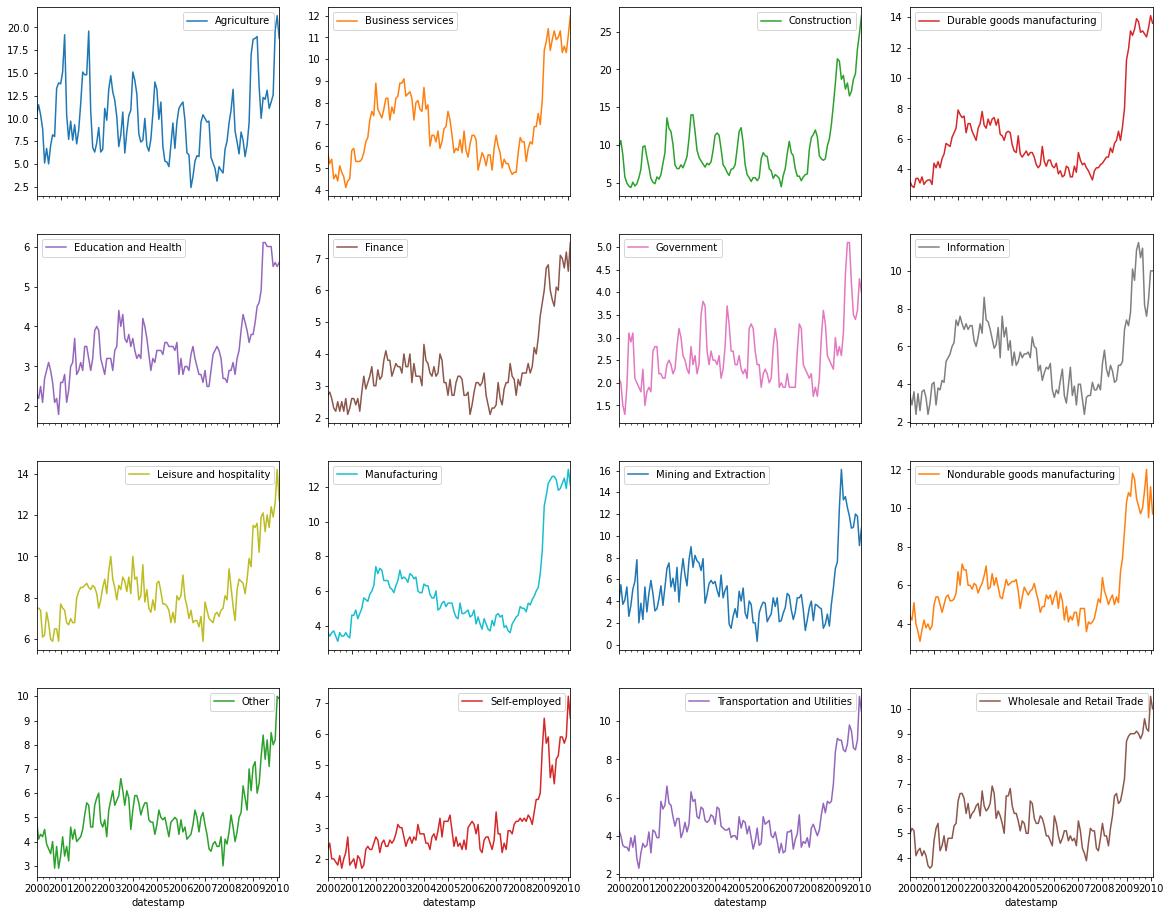

In [ ]:
import matplotlib.pyplot as plt

df.plot(
    subplots = True, 
    layout = (4, 4), 
    figsize = (20, 16), 
    sharex = True, # Tous les graphiques ont les mêmes valeurs dans l'axe des abscisses
    sharey = False) # Les axes des ordonnées sont différents

plt.show()

Le taux de chômage a grimpé en flèche après la crise financière de 2008 et tous les secteurs ont été affectés.

Vous pouvez aussi visualiser ces courbes dans un même graphique :

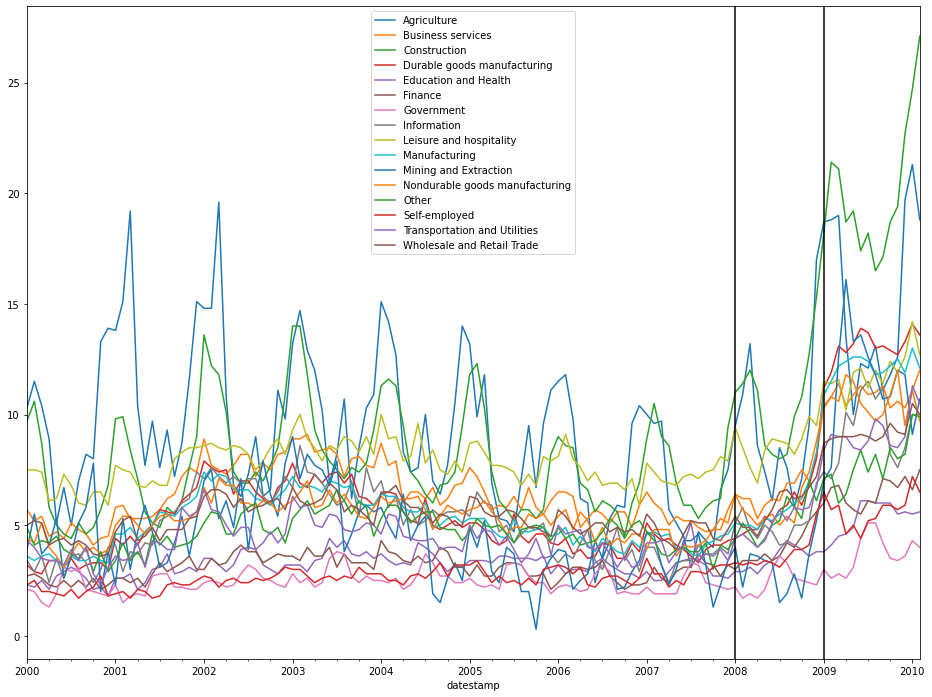

In [ ]:
ax = df.plot(figsize = (16,12))
ax.axvline('2008-01-01', color = 'black')
ax.axvline('2009-01-01', color = 'black')
plt.show()

Analysons à présent les moyennes mensuelles sur la période 2000-2010 des taux de chômage pour les différentes industries :

In [ ]:
# Exraction  du mois de chaque date dans l'index de la dataframe

index_month = df.index.month

index_month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             5,  6,  7,  8,  9, 10, 11, 12,  1,  2],
           dtype='int64', name='datestamp', length=122)

In [ ]:
# Taux de chômage moyens mensuels

unemployment_by_month = df.groupby(index_month).mean()

unemployment_by_month

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
1,13.763636,7.863636,12.909091,6.700000,3.363636,3.572727,2.600000,5.772727,9.345455,6.609091,5.600000,6.481818,5.436364,3.600000,5.790909,6.481818
2,13.645455,7.645455,13.600000,6.563636,3.290909,3.890909,2.327273,5.900000,9.136364,6.500000,5.745455,6.418182,5.618182,3.390909,5.618182,6.372727
3,13.830000,7.130000,11.290000,5.850000,3.110000,3.450000,2.190000,5.360000,8.370000,6.000000,5.140000,6.240000,4.910000,2.880000,5.100000,5.860000
4,9.130000,6.270000,9.450000,5.810000,3.040000,3.280000,2.020000,5.230000,7.700000,5.890000,5.640000,6.060000,4.670000,2.680000,4.790000,5.460000
5,7.100000,6.600000,8.120000,5.690000,3.290000,3.350000,2.200000,5.480000,7.930000,5.720000,5.280000,5.790000,4.810000,2.770000,4.500000,5.490000
6,6.770000,6.720000,7.430000,5.830000,3.820000,3.540000,3.100000,5.260000,8.420000,5.730000,5.570000,5.590000,5.160000,2.600000,4.820000,5.840000
7,7.010000,6.740000,7.350000,6.250000,3.870000,3.520000,3.490000,5.320000,7.950000,6.000000,4.950000,5.570000,5.110000,2.770000,5.040000,5.750000
8,8.080000,6.570000,7.300000,5.780000,3.890000,3.610000,3.360000,5.550000,7.920000,5.660000,4.500000,5.490000,5.410000,2.890000,4.580000,5.610000
9,7.090000,6.790000,7.560000,5.820000,3.540000,3.540000,2.610000,5.730000,7.930000,5.720000,4.480000,5.570000,5.020000,3.070000,4.650000,5.630000


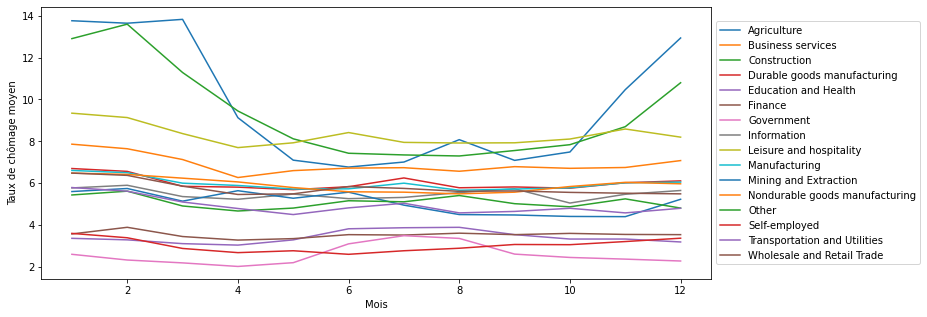

In [ ]:
# Graphique des taux de chomâge moyens mensuels

ax = unemployment_by_month.plot(figsize = (12, 5))

ax.set_xlabel('Mois',)

ax.set_ylabel('Taux de chômage moyen', fontsize=10)

ax.legend(bbox_to_anchor = (1.0, 0.5), 
          loc = 'center left')

plt.show()

La moyenne des valeurs des séries chronologiques par mois montre que le taux de chômage a tendance à être beaucoup plus élevé pendant les mois d'hiver pour l'industrie de l'agriculture et de la construction. 

### Décomposition d'une série temporelle

La décomposition d'une série temporelle consiste à extraire la saisonnalité, la tendance et le bruit de cette série. Dans cette section, vous apprendrez à décomposer plusieurs séries temporelles.

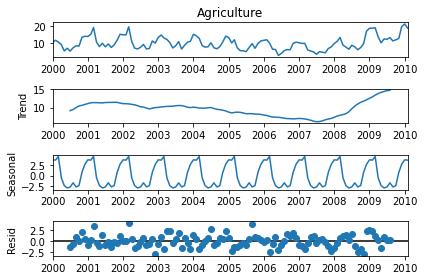

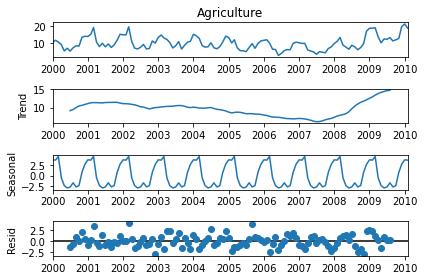

In [ ]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(df['Agriculture'], freq=12).plot()

# <center> **Chapitre 3 : Machine Learning pour la modélisation des séries temporelles**

Parmi les approches traditionnelles de modélisation des séries temporelles, les modèles **ARIMA (*Autoregressive integrated moving average*)** sont les plus utilisés. Les modèles ARIMA ont l'avantage d'être faciles à comprendre et interprétables. Mais, tout comme les autres approches traditionnelles de modélisation statistique des séries temporelles, ils ont des limites d'efficacité pour des problèmes beaucoup plus complexes. Pour ces problèmes complexes, on constate de plus en plus, l'utilisation du Machine Learning dans la prévision de séries temporelles.

**N.B : Si vous êtes intéressés par les modèles ARIMA, vous pouvez apprendre la démarche de modélisation à travers le projet n° 12 de mon livre [Machine Learning par la pratique avec Python: Projets réels dans les Finances, l'Immobilier, le Trading, la Santé, le Marketing, etc.](https://www.amazon.fr/gp/product/B08DV8X9D2/ref=dbs_a_def_rwt_hsch_vamf_tkin_p1_i3). Dans ce projet, je vous explique les différentes étapes de moélisation avec ARIMA telles que l'analyse de la stationnarité, le choix de l'ordre du modèle, le réglage des hyperparamètres du modèles, les critères AIC et BIC, l'évaluation du modèle et les prévisions de valeurs futures. Le projet concerne la prévision des prix de l'indice boursier Dow Jones**.

Dans ce chapitre, vous apprendrez à modéliser une série temporelle en utilisant des algorithmes de Machine Learning. L'objectif est d'utiliser divers modèles de régression basés sur l'apprentissage supervisé pour prédire le cours de l'action LVMH à l'aide d'actifs corrélés et de ses propres données historiques. 

La démarche de modélisation consiste à traduire le problème de prévision de série temporelle en un problème de Machine Learning supervisé comme le montre la figure ci-dessous :

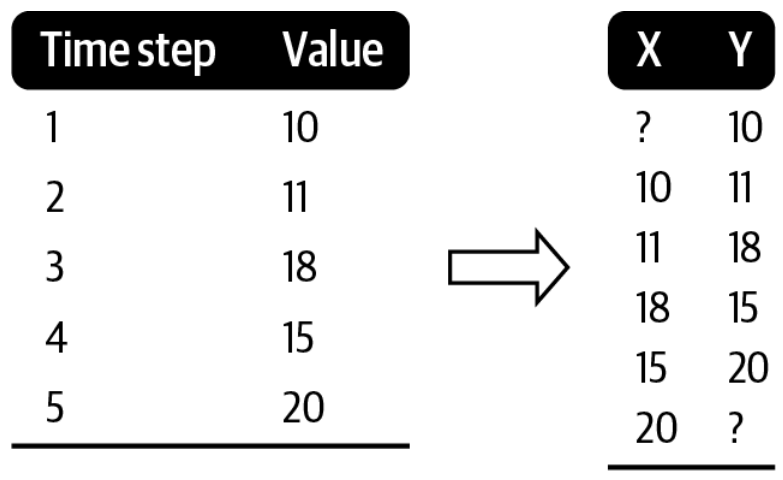

Il s'agit d'utiliser la valeur au pas de temps précédent pour prédire la valeur au pas de temps suivant. Ci-dessus, vous avez les valeurs décalées (*lag* en anglais) d'ordre 1 dans le passé qui constituent la variable indépendante (***X***). La variable ***Y*** est la série temporelle originnelle à prédire. C'est une reproduction du procédé des modèles autorégressifs tels que ARIMA. Bien entendu, avant d'entraîner les différents algorithmes, il faut supprimer les valeurs manquantes.



## Feature Engineering

La plupart du temps en modélisation financière, on ne prédit pas directement le prix d'une action mais on cherche plutôt à prédire le rendement. Ici, nous allons définir notre variable cible comme étant le rendement journalier de l'action LVMH. L'ensemble des variables indépendantes que nous utiliserons est constitué :

* des rendements décalés de 5 jours des autres actions de la dataframe *stocks_price* (Chapitre 2) ;

* des endements décalés de 5, 15, 30 et 60 jours de l'action LVMH.

In [134]:
# Variable cible


period = 5

y = stock_prices['MC.PA']['Adj Close'].shift(-period).pct_change(period)

y.name = 'LVMH_5d_close_future_pct'

y




Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2023-03-27    0.033537
2023-03-28    0.037092
2023-03-29    0.027251
2023-03-30    0.021040
2023-03-31    0.000000
Name: LVMH_5d_close_future_pct, Length: 5987, dtype: float64

In [135]:
# Suppression des valeurs manquantes

y.dropna(inplace = True)

y

Date
2000-01-10    0.161920
2000-01-11    0.093137
2000-01-12    0.032864
2000-01-13   -0.019912
2000-01-14   -0.078723
                ...   
2023-03-27    0.033537
2023-03-28    0.037092
2023-03-29    0.027251
2023-03-30    0.021040
2023-03-31    0.000000
Name: LVMH_5d_close_future_pct, Length: 5982, dtype: float64

Créons maintenant les diférent prédicteurs :

In [136]:

X_SMA_EMA = pd.DataFrame({'Date': stock_prices.index, 'Close': stock_prices['MC.PA']['Adj Close']})
for n in [5, 14, 30, 50, 200]:

    # Création des indicateurs de moyenne mobile et division par le prix de clôture
    X_SMA_EMA['sma' + str(n)] = (stock_prices['MC.PA']['Adj Close'].rolling(window=n).mean()) / stock_prices['MC.PA']['Adj Close']
    
    # Création des indicateurs de moyenne mobile exponentielle et division par le prix de clôture
    X_SMA_EMA['ema' + str(n)] = pd.Series(stock_prices['MC.PA']['Adj Close'].ewm(span=n, min_periods=n).mean()) / stock_prices['MC.PA']['Adj Close']


In [137]:
# RSI de de 5, 14, 30, 50, et 200 jours
def RSI(series, periode):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) 
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) 
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(com=period-1, adjust=False).mean() / d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

X_RSI = pd.DataFrame()

for n in [5, 14, 30, 50, 200]:
    X_RSI['RSI' + str(n)] = RSI(stock_prices['MC.PA']['Adj Close'], n)
    
X_RSI

,RSI5,RSI14,RSI30,RSI50,RSI200
Date,,,,,
2000-01-10,21.259673,21.259673,21.259673,21.259673,21.259673
2000-01-11,30.192047,30.192047,30.192047,30.192047,30.192047
2000-01-12,47.402978,47.402978,47.402978,47.402978,47.402978
2000-01-13,63.604696,63.604696,63.604696,63.604696,63.604696
2000-01-14,71.264566,71.264566,71.264566,71.264566,71.264566
...,...,...,...,...,...
2023-03-27,60.458636,60.458636,60.458636,60.458636,60.458636
2023-03-28,56.145613,56.145613,56.145613,56.145613,56.145613
2023-03-29,64.871841,64.871841,64.871841,64.871841,64.871841


In [138]:
# Importation des volumes d'acions LVMH négociés
"""
lvmh_volume = DataReader(
    'MC.PA', 
    'yahoo', 
    start = '2000-01-01')['Volume']
"""
lvmh_volume = yf.download('MC.PA', start='2000-01-01')['Volume']
lvmh_volume.head()

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03     615855
2000-01-04    1691700
2000-01-05    1563735
2000-01-06    1641215
2000-01-07    1360530
Name: Volume, dtype: int64

In [139]:
# Caractéristiques liées au volume d'actions LVMH négociées 

X_Volume = pd.DataFrame()
X_Volume['Adj_Volume_1d_change'] = lvmh_volume.pct_change()
X_Volume['Adj_Volume_1d_change']

Date
2000-01-03         NaN
2000-01-04    1.746913
2000-01-05   -0.075643
2000-01-06    0.049548
2000-01-07   -0.171023
                ...   
2023-03-31    0.440663
2023-04-03   -0.453773
2023-04-04    0.130987
2023-04-05    0.131095
2023-04-06    0.094846
Name: Adj_Volume_1d_change, Length: 5962, dtype: float64

In [140]:
X_Volume['Adj_Volume_1d_change_SMA'] = (X_Volume['Adj_Volume_1d_change'].rolling(window=5).mean())
X_Volume

,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA
Date,,
2000-01-03,NaN,NaN
2000-01-04,1.746913,NaN
2000-01-05,-0.075643,NaN
2000-01-06,0.049548,NaN
2000-01-07,-0.171023,NaN
...,...,...
2023-03-31,0.440663,0.076537
2023-04-03,-0.453773,0.022128
2023-04-04,0.130987,0.032505


In [141]:
# Rendements décalés de 5 jours des autres actions de la dataframe stock_price

X_lags_others_stocks = pd.concat(
    [stock_prices[stk]['Adj Close'].shift(period).pct_change() for stk in symbols if stk != 'MC.PA'], 
    axis = 1
)

X_lags_others_stocks.columns = [i + '_DT' for i in symbols if i != 'MC.PA']

X_lags_others_stocks.dropna(inplace = True)

X_lags_others_stocks

,AI.PA_DT,ORA.PA_DT,OR.PA_DT,TTE.PA_DT,BNP.PA_DT,SAN.PA_DT,AIR.PA_DT,URW.AS_DT,DSY.PA_DT,ENGI.PA_DT
Date,,,,,,,,,,
2001-09-11,0.007097,0.011852,0.045305,0.012422,0.000000,0.009790,0.050026,0.023689,-0.005530,0.010878
2001-09-12,-0.009609,-0.073207,0.002513,-0.012270,0.011077,0.024931,-0.012036,-0.041322,-0.024096,-0.015748
2001-09-13,0.002587,-0.090047,-0.008145,0.009317,-0.002988,0.037162,-0.032487,0.017241,-0.053656,0.000000
2001-09-14,-0.007097,0.000000,-0.023373,-0.014769,-0.012987,-0.009772,-0.049843,-0.010170,0.007275,-0.027733
2001-09-17,-0.022092,0.075347,0.006468,-0.001874,-0.012146,-0.032895,-0.053562,-0.012843,0.050311,-0.009051
...,...,...,...,...,...,...,...,...,...,...
2023-03-27,0.022144,0.011731,0.017620,0.013549,0.017028,-0.003786,0.015933,0.020015,0.002658,0.009976
2023-03-28,-0.003057,0.011595,-0.003489,0.025065,0.041476,0.008048,0.025295,0.009245,-0.005701,0.021230
2023-03-29,0.007732,0.000555,0.021266,-0.001651,-0.004932,0.007540,-0.004934,-0.074967,-0.003867,0.002165


In [142]:
# Ensemble total des prédicteurs

X = pd.concat([X_SMA_EMA, X_RSI, X_Volume, X_lags_others_stocks], axis = 1)

X


,Date,Close,sma5,ema5,sma14,ema14,sma30,ema30,sma50,ema50,...,AI.PA_DT,ORA.PA_DT,OR.PA_DT,TTE.PA_DT,BNP.PA_DT,SAN.PA_DT,AIR.PA_DT,URW.AS_DT,DSY.PA_DT,ENGI.PA_DT
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,57.441422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,2000-01-04,52.007778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,2000-01-05,50.248299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,2000-01-06,49.679070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,2000-01-07,49.679070,1.042917,1.019135,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,2023-03-31,844.400024,0.976930,0.980648,0.960031,0.966941,0.955463,0.957342,0.955187,0.943935,...,-0.011497,-0.013671,0.001384,-0.03032,-0.05274,0.013147,-0.021177,-0.024064,-0.014439,-0.023453
2023-04-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# La datatest finale

clean_dataset = pd.concat([y, X], axis=1)

clean_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
clean_dataset.dropna()


,LVMH_5d_close_future_pct,Date,Close,sma5,ema5,sma14,ema14,sma30,ema30,sma50,...,AI.PA_DT,ORA.PA_DT,OR.PA_DT,TTE.PA_DT,BNP.PA_DT,SAN.PA_DT,AIR.PA_DT,URW.AS_DT,DSY.PA_DT,ENGI.PA_DT
Date,,,,,,,,,,,,,,,,,,,,,
2001-09-11,-0.200926,2001-09-11,29.810129,1.090340,1.079441,1.173089,1.147195,1.215763,1.196185,1.231884,...,0.007097,0.011852,0.045305,0.012422,0.000000,0.009790,0.050026,0.023689,-0.005530,0.010878
2001-09-12,-0.176648,2001-09-12,28.324230,1.103110,1.090713,1.213705,1.179727,1.267688,1.242231,1.290511,...,-0.009609,-0.073207,0.002513,-0.012270,0.011077,0.024931,-0.012036,-0.041322,-0.024096,-0.015748
2001-09-13,-0.206812,2001-09-13,26.831755,1.115266,1.100921,1.251916,1.212635,1.323262,1.291243,1.354629,...,0.002587,-0.090047,-0.008145,0.009317,-0.002988,0.037162,-0.032487,0.017241,-0.053656,0.000000
2001-09-14,-0.251844,2001-09-14,24.957939,1.140042,1.122385,1.309706,1.263188,1.404926,1.363143,1.448409,...,-0.007097,0.000000,-0.023373,-0.014769,-0.012987,-0.009772,-0.049843,-0.010170,0.007275,-0.027733
2001-09-17,-0.108007,2001-09-17,24.471409,1.098388,1.096466,1.299608,1.249861,1.413800,1.365068,1.466577,...,-0.022092,0.075347,0.006468,-0.001874,-0.012146,-0.032895,-0.053562,-0.012843,0.050311,-0.009051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,0.033537,2023-03-27,817.000000,0.997013,0.995289,0.982812,0.987890,0.986169,0.982219,0.983576,...,0.022144,0.011731,0.017620,0.013549,0.017028,-0.003786,0.015933,0.020015,0.002658,0.009976
2023-03-28,0.037092,2023-03-28,814.200012,1.002284,0.999141,0.986525,0.992449,0.989712,0.986526,0.987372,...,-0.003057,0.011595,-0.003489,0.025065,0.041476,0.008048,0.025295,0.009245,-0.005701,0.021230
2023-03-29,0.027251,2023-03-29,822.000000,0.994501,0.993107,0.978624,0.985294,0.980296,0.978638,0.978491,...,0.007732,0.000555,0.021266,-0.001651,-0.004932,0.007540,-0.004934,-0.074967,-0.003867,0.002165


In [144]:
# Feature ingénierie des dates

days_of_week = pd.get_dummies(
    clean_dataset.index.dayofweek, 
    prefix = 'weekday', 
    drop_first = True)

days_of_week.index = clean_dataset.index

clean_dataset = pd.concat([clean_dataset, days_of_week], axis = 1)

clean_dataset

,LVMH_5d_close_future_pct,Date,Close,sma5,ema5,sma14,ema14,sma30,ema30,sma50,...,BNP.PA_DT,SAN.PA_DT,AIR.PA_DT,URW.AS_DT,DSY.PA_DT,ENGI.PA_DT,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,2000-01-03,57.441422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2000-01-04,NaN,2000-01-04,52.007778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
2000-01-05,NaN,2000-01-05,50.248299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
2000-01-06,NaN,2000-01-06,49.679070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
2000-01-07,NaN,2000-01-07,49.679070,1.042917,1.019135,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.0,2023-03-31,844.400024,0.976930,0.980648,0.960031,0.966941,0.955463,0.957342,0.955187,...,-0.05274,0.013147,-0.021177,-0.024064,-0.014439,-0.023453,0,0,0,1
2023-04-03,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2023-04-04,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0


## Analyse exploratoire des données

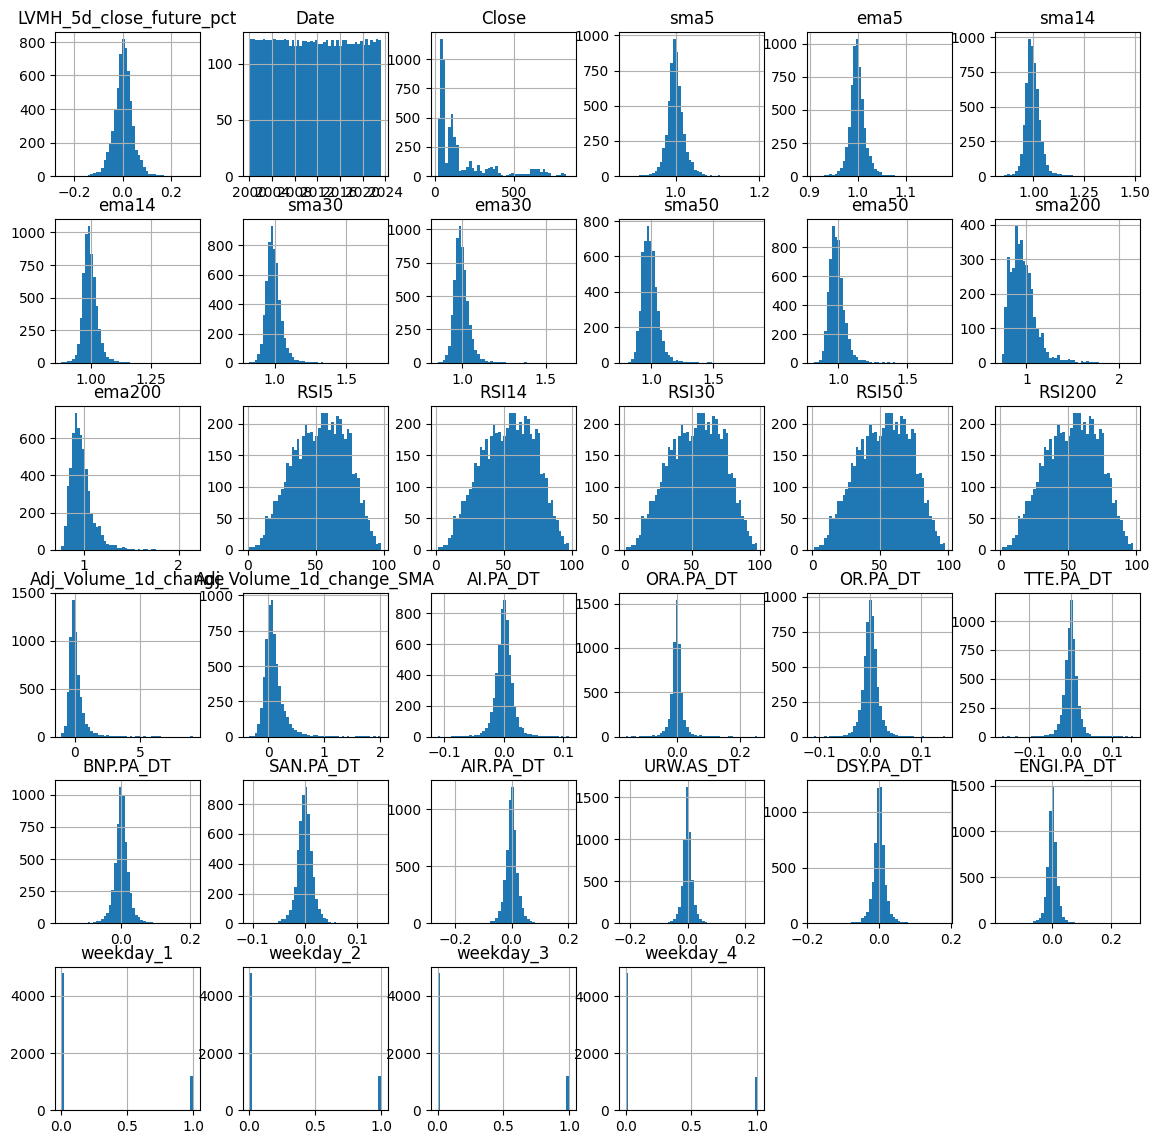

In [145]:
# Histogrammes

clean_dataset.hist(
    bins=50, 
    sharex=False, 
    sharey=False, 
    figsize=(14,14)
)

plt.show()

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

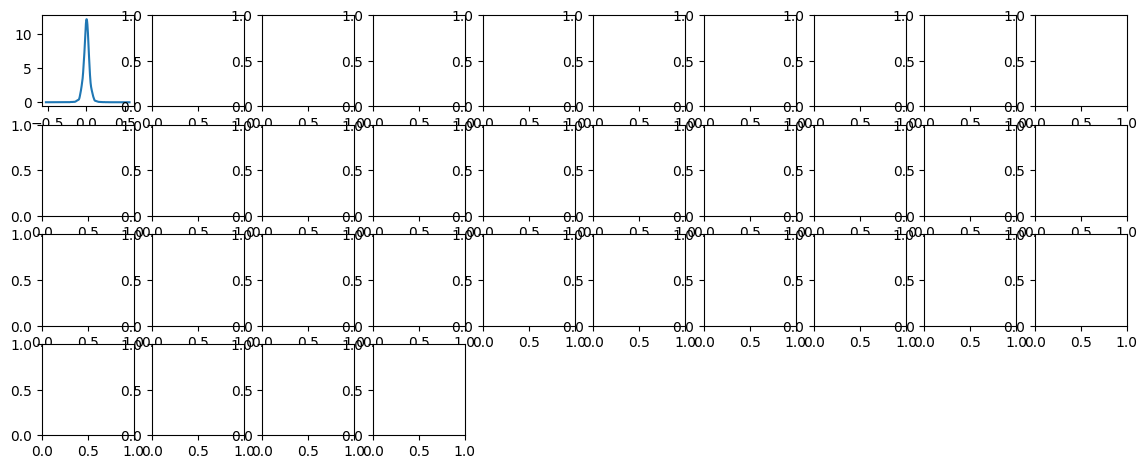

In [146]:
# Densités

clean_dataset.plot(
    kind = 'density',
    subplots = True,
    layout=(10,10),
    sharex=False, 
    sharey=False, 
    legend = True,
    figsize=(14,14)
)

plt.show()

In [ ]:
# Matrice de graphiques

#sns.pairplot(clean_dataset);

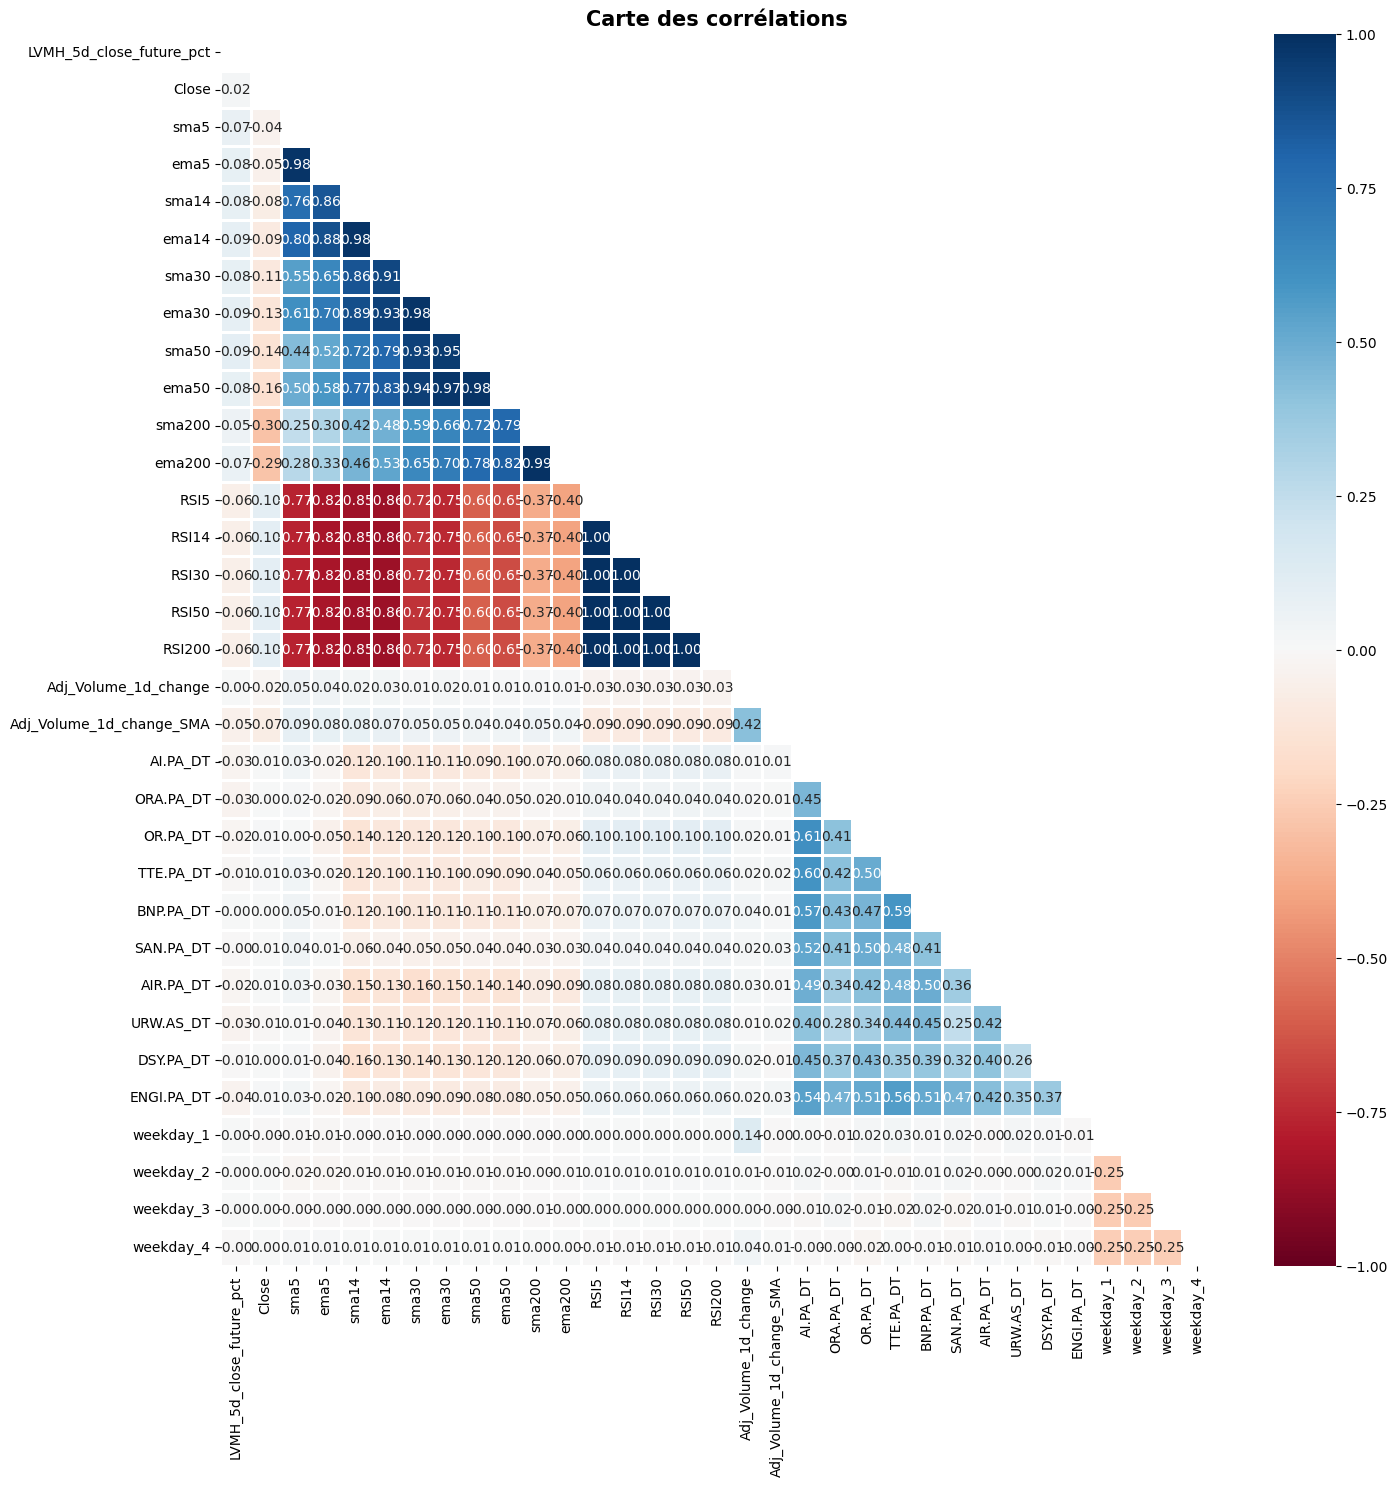

In [147]:
# Carte des corrélations

plt.figure(figsize=(16,16))

mask = np.triu(np.ones_like(clean_dataset.corr(), dtype=bool))

sns.heatmap(clean_dataset.corr(), 
            mask=mask, center=0, cmap='RdBu', linewidths=1, 
            annot=True, fmt=".2f", vmin=-1, vmax=1
)

plt.title('Carte des corrélations', fontsize=15, fontweight="bold")

plt.show()

## Modélisation

Pour la modélisation des séries temporelles, les données d'entraînement doivent être les données les plus anciennes et les données de test doivent être les données les plus récentes.

In [148]:
# Données d'entraînement et de test

y = clean_dataset['LVMH_5d_close_future_pct']

X = clean_dataset.drop('LVMH_5d_close_future_pct', axis = 1)

validation_size = 0.25

train_size = int(len(X) * (1-validation_size))

X_train, X_test = X[0:train_size], X[train_size:len(X)]

Y_train, Y_test = y[0:train_size], y[train_size:len(X)]

In [149]:
X_train.shape

(4493, 33)

In [150]:
Y_train.shape

(4493,)

In [151]:
X_test.shape

(1498, 33)

In [152]:
Y_test.shape

(1498,)

In [153]:
# Liste des algorithmes à entraîner

seed = 123

models = []

models.append(('LR', {'model':LinearRegression()}))
models.append(('LASSO', {'model':Lasso()}))
models.append(('EN', {'model':ElasticNet()}))
models.append(('KNN', {'model':KNeighborsRegressor()}))
models.append(('CART', {'model':DecisionTreeRegressor(random_state = seed)}))
models.append(('SVR', {'model':SVR()}))

models.append(('MLP', {'model':MLPRegressor(random_state = seed)}))

models.append(('ABR', {'model':AdaBoostRegressor(random_state = seed)}))
models.append(('XGBOOST', {'model':XGBRegressor(random_state=seed)}))
models.append(('GBR', {'model':GradientBoostingRegressor(random_state = seed)}))

models.append(('RFR', {'model':RandomForestRegressor(random_state = seed)}))
models.append(('ETR', {'model':ExtraTreesRegressor(random_state = seed)}))

In [154]:
algos_ml = dict(models)
algos_ml

{'LR': {'model': LinearRegression()},
 'LASSO': {'model': Lasso()},
 'EN': {'model': ElasticNet()},
 'KNN': {'model': KNeighborsRegressor()},
 'CART': {'model': DecisionTreeRegressor(random_state=123)},
 'SVR': {'model': SVR()},
 'MLP': {'model': MLPRegressor(random_state=123)},
 'ABR': {'model': AdaBoostRegressor(random_state=123)},
 'XGBOOST': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
      

In [158]:
from sklearn.model_selection import cross_val_score
num_folds = 5
scoring = 'neg_mean_squared_error'
kfold_results = []

for model_name in algos_ml.keys():
    
    kfold = KFold(n_splits=num_folds)
    #Conversion de 'neg_mean_squared_error' en valeur positive pour calculer RMSE (racine carrée de MSE)
                # plus l'erreur est faible, plus le modèle est performant
    cv_results = np.sqrt(-1* cross_val_score(algos_ml[model_name]['model'], X_train, Y_train, cv=kfold, scoring=scoring))
    kfold_results.append(cv_results)
    algos_ml[model_name]['Mean CV results'] = cv_results.mean()
    algos_ml[model_name]['Std CV results'] = cv_results.std()
    
    fitted_model = algos_ml[model_name]['model'].fit(X_train, Y_train)
    algos_ml[model_name]['RMSE train'] = np.sqrt(mean_squared_error(Y_train, fitted_model.predict(X_train)))
    algos_ml[model_name]['RMSE test'] = np.sqrt(mean_squared_error(Y_test, fitted_model.predict(X_test)))
    algos_ml[model_name]['R² train'] = r2_score(Y_train, fitted_model.predict(X_train))
    algos_ml[model_name]['R² test'] = r2_score(Y_test, fitted_model.predict(X_test))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/domachowski/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/domachowski/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 648, in fit
    X, y = self._validate_data(
  File "/home/domachowski/.local/lib/python3.8/site-packages/sklearn/base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/domachowski/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/home/domachowski/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 778, in check_array
    dtype_orig = np.result_type(*dtypes_orig)
  File "<__array_function__ internals>", line 200, in result_type
TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>)


In [ ]:
algos_ml

{'LR': {'model': LinearRegression(),
  'Mean CV results': 0.0420421493496272,
  'Std CV results': 0.013994905735224916,
  'RMSE train': 0.04136590796067917,
  'RMSE test': 0.039498012929672664,
  'R² train': 0.026343007169387866,
  'R² test': 0.0002885936795056221},
 'LASSO': {'model': Lasso(),
  'Mean CV results': 0.04024630513893933,
  'Std CV results': 0.012489143060392607,
  'RMSE train': 0.04192176582301949,
  'RMSE test': 0.039606044544038994,
  'R² train': 0.0,
  'R² test': -0.005187536683548322},
 'EN': {'model': ElasticNet(),
  'Mean CV results': 0.04024630513893933,
  'Std CV results': 0.012489143060392607,
  'RMSE train': 0.04192176582301949,
  'RMSE test': 0.039606044544038994,
  'R² train': 0.0,
  'R² test': -0.005187536683548322},
 'KNN': {'model': KNeighborsRegressor(),
  'Mean CV results': 0.04436780801663142,
  'Std CV results': 0.01145353789126649,
  'RMSE train': 0.036962378195516114,
  'RMSE test': 0.04296745357811589,
  'R² train': 0.22260690742350653,
  'R² test':

In [ ]:
# Meilleur affichage sous forme de tableau

results_metrics = pd.DataFrame.from_dict(
    algos_ml, 
    'index')[['RMSE train', 'RMSE test', 'Mean CV results', 'Std CV results', 'R² train', 'R² test']]

with pd.option_context('display.precision', 3):
    best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

best_print

,RMSE train,RMSE test,Mean CV results,Std CV results,R² train,R² test
LR,4.136591e-02,0.039498,0.042042,0.013995,0.026343,0.000289
LASSO,4.192177e-02,0.039606,0.040246,0.012489,0.000000,-0.005188
EN,4.192177e-02,0.039606,0.040246,0.012489,0.000000,-0.005188
GBR,3.236571e-02,0.040382,0.043190,0.014984,0.403938,-0.044978
ETR,6.145222e-14,0.040390,0.043126,0.015047,1.000000,-0.045351
RFR,1.470575e-02,0.040433,0.042622,0.014692,0.876946,-0.047599
SVR,4.267695e-02,0.040626,0.041710,0.011647,-0.036353,-0.057629
ABR,3.830285e-02,0.040636,0.041685,0.014114,0.165199,-0.058139
MLP,4.243641e-02,0.041247,0.042223,0.013698,-0.024704,-0.090212
KNN,3.696238e-02,0.042967,0.044368,0.011454,0.222607,-0.183051


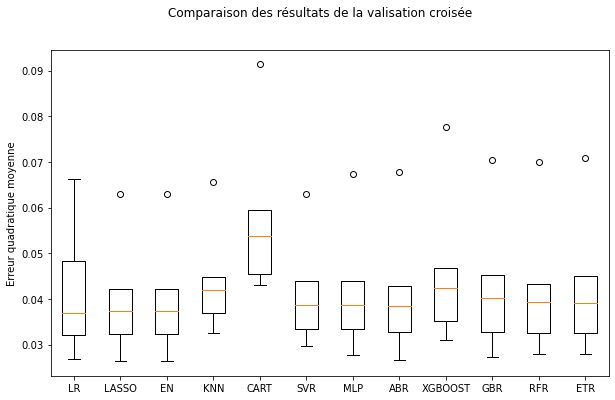

In [ ]:
# Comparaison des résultats de la valisation croisée

fig = plt.figure()
fig.suptitle('Comparaison des résultats de la valisation croisée')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(list(algos_ml.keys()))
fig.set_size_inches(10,6)
plt.ylabel('Erreur quadratique moyenne')
plt.show()

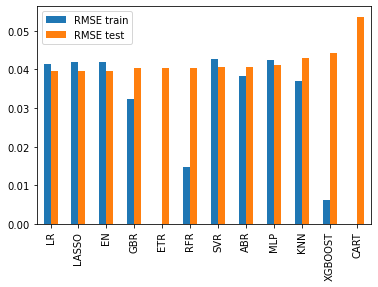

In [ ]:
# Comparaison des Erreurs d'entraînement et de test pour tous les modèles

best_print[['RMSE train', 'RMSE test']].plot(kind = 'bar');

In [ ]:
# Modèle final

best_model = algos_ml['LR']['model']
best_model

LinearRegression()

In [ ]:
# Fonction d'évaluation du modèle

def evaluate_model(nom_model, predictions):
    plt.figure(figsize = (10, 6))
    l1, = plt.plot(Y_test.index, np.exp(Y_test).cumprod(), label = 'Observation')
    l2, = plt.plot(Y_test.index, predictions, label = 'Prediction')
    plt.legend(handles = [l1, l2])
    plt.show()

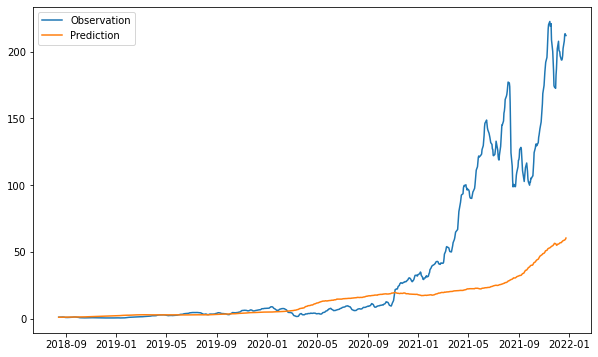

In [ ]:
evaluate_model(best_model, predictions = np.exp(best_model.predict(X_test)).cumprod())

En regardant le graphique, nous voyons clairement que la tendance a été parfaitement capturée par le modèle. La série prédite est moins volatile par rapport à la série chronologique réelle, et elle s'aligne sur les données réelles des premiers mois de l'ensemble de test. Un point à noter est que le but du modèle est de calculer le rendement du lendemain compte tenu des données observées jusqu'à aujourd'hui, et non de prédire le cours de l'action plusieurs jours dans le futur compte tenu des données actuelles. Par conséquent, un écart par rapport aux données réelles est attendu à mesure que nous nous éloignons du début de l'ensemble de test. Le modèle semble bien fonctionner pendant les premiers mois, l'écart par rapport aux données réelles augmentant deux ans (Septembre 2018 à Septembre 2020) après le début de l'ensemble de test. 

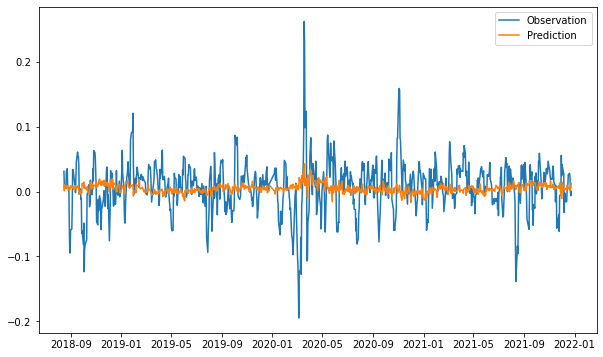

In [ ]:
plt.figure(figsize = (10, 6))
l1, = plt.plot(Y_test.index, Y_test, label = 'Observation')
l2, = plt.plot(Y_test.index, best_model.predict(X_test), label = 'Prediction')
plt.legend(handles = [l1, l2])
plt.show()

In [ ]:
# Sauvegarde du modèle

import joblib

joblib.dump(value = best_model, filename = 'final_model.pkl')

['final_model.pkl']

In [ ]:
import pandas as pd
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [ ]:
df.shift(periods=3) #------->features (periode positive)

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,10.0,13.0,17.0
2020-01-05,20.0,23.0,27.0


In [ ]:
df.shift(periods=-3) #------->target (periode negative)

,Col1,Col2,Col3
2020-01-01,30.0,33.0,37.0
2020-01-02,45.0,48.0,52.0
2020-01-03,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN
